# New tutorial
This tutorial shows how to read, interpolate and visualize bathymetry data obtained from the [Canadian Hydrographic Service](https://open.canada.ca/data/en/dataset/d3881c4c-650d-4070-bf9b-1e00aabf0a1d)

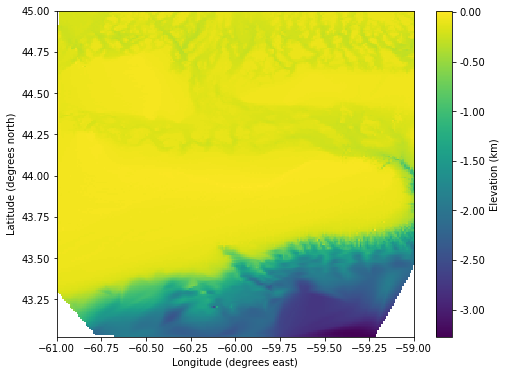

In [6]:
from kadlu.geospatial.bathy_reader import LatLon
from kadlu.geospatial.load import load_bathy
from kadlu.geospatial.interpolation import Interpolator2D
import matplotlib.pyplot as plt

# folder where the GeoTIFF files are stored
folder = 'assets/'

# load the bathymetry data
bathy, lats, lons = load_bathy(storage_location=folder, latlon_SW=LatLon(43,-61), latlon_NE=LatLon(45,-59), source="CHS")

# initialize an interpolator
interp = Interpolator2D(bathy, lats, lons, method='cubic') 

# plot the bathymetry using a 200 x 200 grid
interp.plot_ll(lat_bins=200, lon_bins=200)

# draw the plot
plt.show()

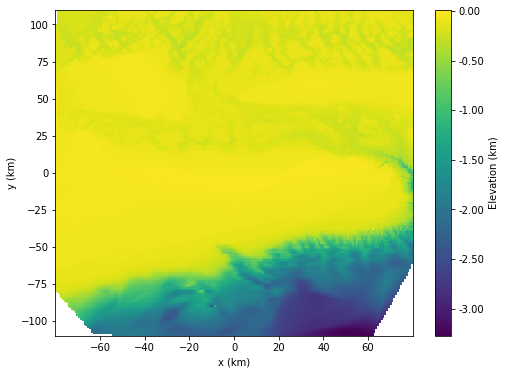

In [7]:
interp.plot_xy(x_bins=200, y_bins=200)
plt.show()

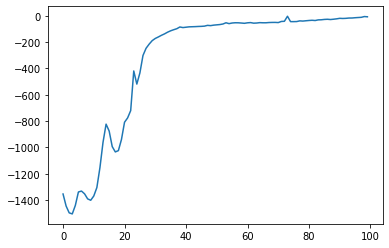

In [9]:
from kadlu.geospatial.bathy_reader import LatLon

# make a 70-km long one-dimensional slice, following a straight line in a 
# NW direction starting from the center of the map 
slice = interp.slice(angle=135, distance=70E3, origin=LatLon(43.5,-59.5))

# plot the slice
plt.plot(slice)
plt.show()

In [ ]:
# make 4 such slices at uniformly spaced angles, starting at 0 degrees (east)
slices = interp.slice(angle=0, num_slices=4, distance=70E3, origin=LatLon(43.5,-59.5))

# plot the four slices
import numpy as np
titles = ['E', 'N', 'W', 'S']
for i, (t,s) in enumerate(zip(titles, slices)):
    plt.subplot(221+i)
    n = len(s)
    x = np.arange(n, dtype=float)
    x = x / n * 70
    plt.plot(x, s)
    plt.title(t)

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()